In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm, chi2,gamma
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, kendalltau, spearmanr, weightedtau,pointbiserialr
import seaborn as sns


In [2]:
df=pd.read_csv('voitures1.csv') 
df.head()

,Modèle,État,Année-Modèle,Marque,Origine,Kilométrage,Première main,Nombre de portes,carburant,Ville,boite,puissance,price
0,Tiguan,NaN,2012.0,Volkswagen,Dédouanée,194999.5,NaN,NaN,Diesel,Fquih Ben Saleh,NaN,8 CV,210000.0
1,190,Très bon,2005.0,Mercedes-Benz,Dédouanée,274999.5,Non,5.0,NaN,Dakhla,Manuelle,8 CV,55000.0
2,Lodgy,Très bon,2012.0,Dacia,WW au Maroc,2499.5,Oui,5.0,Diesel,Ouled Teïma,NaN,6 CV,87000.0
3,2,Excellent,2008.0,Mazda,WW au Maroc,124999.5,Oui,5.0,NaN,El Jadida,Manuelle,8 CV,54000.0
4,Kadjar,Excellent,2016.0,Renault,WW au Maroc,82499.5,Oui,5.0,NaN,Casablanca,Manuelle,6 CV,159000.0


In [3]:
df1=df.copy()


In [5]:
def cramers_v(confusion_matrix):
    """Calculate Cramer's V measure of association between two categorical variables"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# create a contingency table

contingency_table = pd.crosstab(df1['Kilométrage'], df1['Marque'])

# calculate Cramer's V
v = cramers_v(contingency_table.values)

# print the result
print("Cramer's V: {:.2f}".format(v))

Cramer's V: 0.07


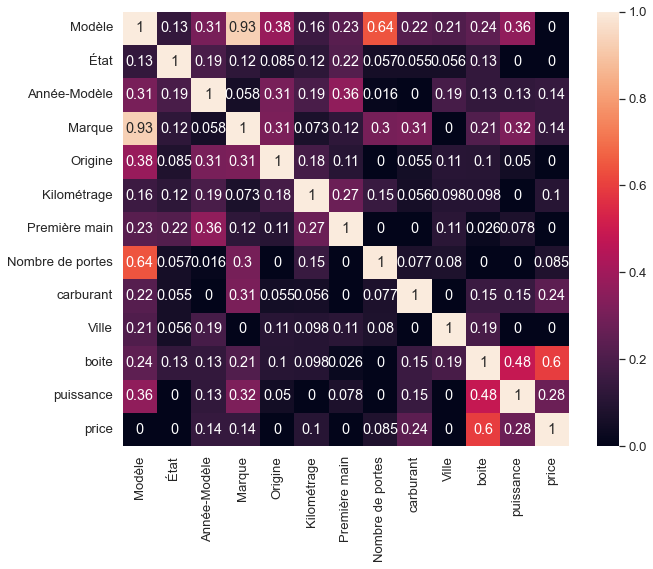

In [6]:
data=df1.copy()
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

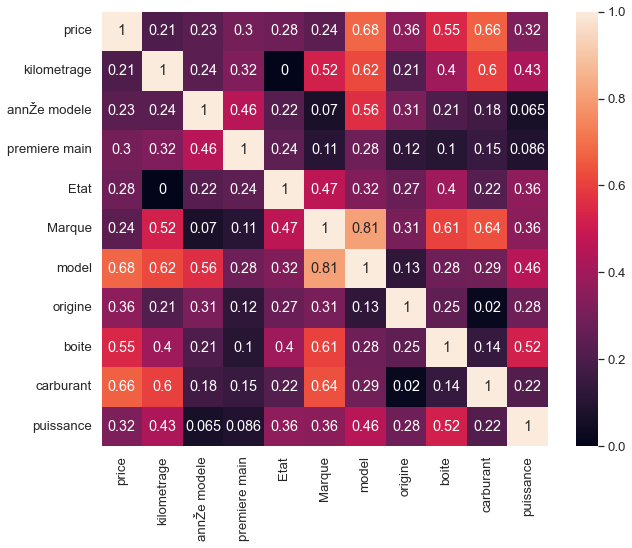

In [92]:
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

In [93]:
data.columns

Index(['price', 'kilometrage', 'annŽe modele', 'premiere main', 'Etat',
       'Marque', 'model', 'origine', 'boite', 'carburant', 'puissance'],
      dtype='object')

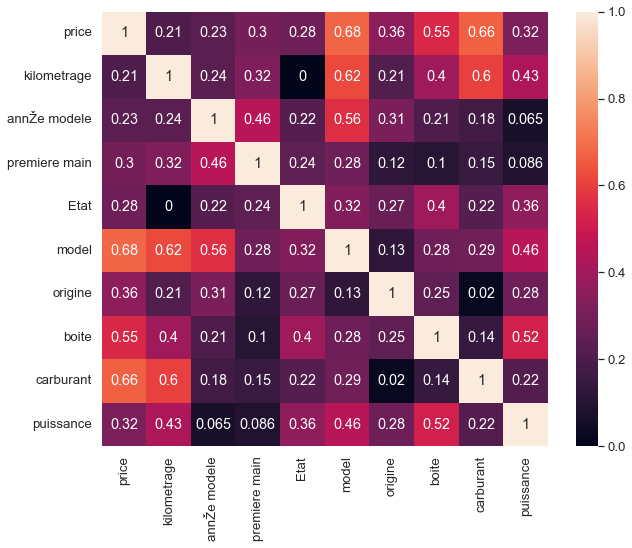

In [95]:
data = data.drop('Marque', axis=1)
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

In [97]:
from sklearn.preprocessing import LabelEncoder


lab = LabelEncoder()
data['premiere main'] = lab.fit_transform(data['premiere main'])

mask = np.logical_or(np.isinf(data['annŽe modele']), np.isnan(data['annŽe modele']))
data = data.dropna(subset=['annŽe modele'])

masked_année_modele = data['annŽe modele']
masked_premiere_main = data['premiere main']

corr, p_value = pointbiserialr(masked_année_modele, masked_premiere_main)

print('Point-biserial correlation coefficient:', corr)
print('P-value:', p_value)

Point-biserial correlation coefficient: 0.3765988212392169
P-value: 5.641594047212376e-51


In [98]:
from sklearn.preprocessing import LabelEncoder

column="kilometrage"
lab = LabelEncoder()
data[column] = lab.fit_transform(data[column])

mask = np.logical_or(np.isinf(data[column]), np.isnan(data['annŽe modele']))
data = data.dropna(subset=['annŽe modele'])

masked_année_modele = data['annŽe modele']
masked_column = data[column]

corr, p_value = pointbiserialr(masked_année_modele, masked_column)

print('Point-biserial correlation coefficient:', corr)
print('P-value:', p_value)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

In [ ]:
from sklearn.preprocessing import LabelEncoder

column="Etat"
lab = LabelEncoder()
data[column] = lab.fit_transform(data[column])

mask = np.logical_or(np.isinf(data[column]), np.isnan(data['année modele']))
data = data.dropna(subset=['année modele'])

masked_année_modele = data['année modele']
masked_column = data[column]

corr, p_value = pointbiserialr(masked_année_modele, masked_column)

print('Point-biserial correlation coefficient:', corr)
print('P-value:', p_value)

In [ ]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA

hasher = FeatureHasher(n_features=10, input_type="string")
X_hashed = hasher.transform(data["model"])

# Determine the optimal number of components for PCA
pca = PCA()
pca.fit(X_hashed.toarray())
variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(variance >= 0.95) + 1

# Apply PCA to the hashed data with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_hashed.toarray())

# Print the PCA results and the optimal number of components
print("PCA results:")
print(X_pca)
print(f"Optimal number of components: {n_components}")

In [ ]:
pd.set_option("display.max_rows", None)
data["model"].value_counts()


In [ ]:
data["kilometrage"]=data["kilometrage"].astype(str)
for index, row in data.iterrows():
    if ' - ' in data.loc[index,"kilometrage"]:
        data.loc[index,"kilometrage"]=data.loc[index,"kilometrage"].split(" - ")[0].split(" ")[0]
    else:
        data.drop(index, inplace=True)
data.tail()
        
    

In [ ]:
data["kilometrage"]=data["kilometrage"].astype(float)